# PCA - Principle Component Analysis

**Important:** For all implementations in this project, we make sure to use NumPy whenever possible. Most computations on vectors and matrices can be implemented very efficiently using the NumPy API. There is no need for looping over vectors etc. As a simple example, in order to compute the mean of a vector, just use `numpy.mean()`. If you are not familiar with NumPy please consult the NumPy tutorial that you find in the CMS under *Materials*. Further, in case of any doubts, the Forum is the best place to ask questions and discuss the project.  

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

---

Features are our friends for prediction. For example, knowing the weight of a person is helpful for predicting his/her height. Knowing both the weight and age may improve the accuracy of our prediction. However, too many features could harm: each feature can be thought of as a dimension, $n$ features correspond to a $n$ dimensional space. In a high dimensional space ($n$ is very large), our data will distribute sparsely: if you draw unit grids in the space, the most of them will contain no data, which obstructs the learning process. This is called the *curse of dimensionality* (for more detail about the curse of dimensionality, see [here](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)).


To overcome the curse of dimensionality, we simply reduce the dimensionality (i.e. reduce the number of features). We can either select a subset of all features, or we can apply PCA on our dataset. By specifying a $d$ ($d$<$n$), PCA will project our $n$ dimensional data onto a $d$ dimensional (affine) space. The assumption is that classification/regression should be easier in this $d$ dimensional space.

A tutorial of PCA can be found here: [PCA Tutorial](http://www.iro.umontreal.ca/~pift6080/H09/documents/papers/pca_tutorial.pdf) 

The goal is to apply PCA on a small dataset: [The Digits Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) 

#### 1.1. Data Normalization
Before applying PCA to our data, we first need to center the features by subtracting the mean of each feature. That is, given a design matrix $X \in \mathbb{R}^{n \times d}$ ($n$ samples, each with $d$ dimensional features), we apply the following formula:

\begin{equation*}
  \hat{x_{ij}} = x_{ij} - \mu(x_i) \textrm{ for } i = 1,\cdots, d, j = 1,\cdots,n
\end{equation*}

where $\mu(x_i)$ is the mean of the $i$-th column of $X$.

**Question 1:** Is this centering step important regarding the performance of the PCA? What might happen if we don't center our data? (1 point)

*Answer:* Computing the covariance matrix implicitly performs centering, and since variance by definition, is the average squared deviation from the mean, centered and non-centered data will have identical covariance matrices (basically, we get covaiance matrix and from there eigen-decomposition). In this case, centering does not make any difference.
However, in some cases, centering data might help to get rid of the intercept in regression. Overall it means following: centering data does not alter the slope of regression line, but untercept becomes zero.
In the other case not centering data will lead to the situation when the first principal component may pierce the cloud not along the main direction of the cloud, and will be (for statistics purposes) misleading.


**Task 1:** Implement the following function which performs data normalization (i.e. normalize the columns of $X$) according to the description above. (1 point)

In [2]:
def data_normalization(data):
    # TODO: implement
    meanVal = np.mean(data_matrix,axis=0) #mean by column
    data_normalized=data_matrix-meanVal
    return data_normalized

#### 1.2  Apply PCA on Digits Dataset
In the following we will apply PCA on the digits dataset from sklearn. This dataset consists of 1797 images of size 8X8, each images contain a handwritten digit (0-9).
The digits look as follows:
![Image of digits](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png)

In [3]:
# import the digits dataset
from sklearn import datasets

In [4]:
# perform data normalization
data_matrix = datasets.load_digits().data
targets = datasets.load_digits().target
data_normalized = data_normalization(data_matrix)

Before applying PCA, let's take a look on a subset of original features and analyse whether they are discriminative for digits classification.

**Task 2:** Implement the following using matplotlib: (2 points)
1. Construct a 2D scatter plot. Plot the value of feature 0 (on $x$ axis) and feature 2 (on $y$ axis) for each data point, use different colors indicating different classes. 
2. Set corresponding labels: assign label "feature 0" for $x$ axis and "feature 2" for $y$ axis.
3. Set the title of the plot as "A subset of original features".
4. Show legends for each class.
5. After you have finished the first four steps and plotted the graph, you might observe that many data points overlap. This is because many data points have exactly the same value w.r.t. feature 0 and feature 2. In order to have a better visualization, please jitter the data points in your scatter plot, this step is called jittering. For more details about jittering, see [here](https://stats.stackexchange.com/questions/253009/why-jitter-continuous-value-in-a-scatterplot).



No handles with labels found to put in legend.


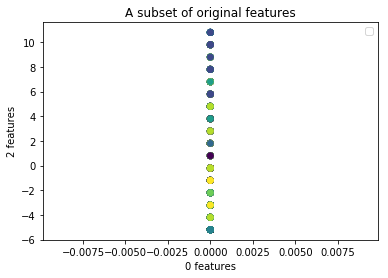

In [5]:
# TODO: Construct a 2D scatter plot
x = data_normalized[:,0] 
y = data_normalized[:,2]
plt.xlabel("0 features")
plt.ylabel("2 features")

plt.scatter(x,y,c=targets)
plt.title('A subset of original features')
plt.legend(loc = 'upper right')

**Question 2:** What is the dimensionality of the new feature space? Is is easy to perform digit classification in this feature space? Justify your answer. (1 point)

*Answer:* Each feature can be thought of as a "dimension" of the problem in the feature space. (e.g.3D feature space can be represented as following: "The authorship of
12 of those papers are disputed between Hamilton/Madison. Using the frequency of use for 3 words as features, we can consider each of the documents a “point” in 3D feature space" (c) - example taknen from http://pages.cs.wisc.edu, "feature space" lecture. Another example would be the human face. We can describe it by combination of characteristics s.t.:
skin color, represented as value describing the concentration of the certain pigment;
hair color;
distance between nose and the mouth;
eyes color;
distance between the eyes;
head height and width, etc. 
In this case we can say that we can describe a human face using 7-dimensional feature vector.
I's rather straightforward if one is using supervised classification. We can select pixels to represent patterns or land the cover features. The main problem of classification in the case of multiple feature spaces or sources has been mostly dealt with in the past by ensemble learning methods (combinations of individual classifiers). Thus, we have to train one classifier in every feature space and then combine their class predictive distributions ("Combining feature spaces for classification", T.Damoulas, M. A. Girolami).

**Task 3:** Implement the function `PCA()` below. The input of this function is a normalized dataset and a parameter $d$, which specifies the output dimension (dimension of the projected space). The output should be a dataset/matrix of $\mathbb{R}^{n \times d}$. (Hint: `numpy.linalg.eig()` might be helpful here.) (4 points)

In [6]:
def PCA(data, d):
    """
    perform PCA on a dataset
    :param data: input dataset with shape (n,k).
    :param d: dimension of the output space.
    :return: a matrix of shape (n,d). where each row represents the (PCA) projection of each data point.
    """
    # TODO: implement
    # REMARK: note the eigenvalues/eigenvectors returned by np.linalg.eig() might not be ordered. You may want to order them first. 
    
    meanVal=np.mean(data_matrix,axis=0) #mean by column
    
    covMat=np.cov(data_normalized,rowvar=0)
    
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))
    
    eigValIndice=np.argsort(eigVals,axis=0) 
    
    n_eigValIndice=eigValIndice[-1:-(d+1):-1]
    
    n_eigVect=eigVects[:,n_eigValIndice]
    
    lowDDataMat=data_normalized*n_eigVect
    
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal
    
    return lowDDataMat,reconMat

**Task 4:** Apply `PCA()` on the normalized dataset using $d=2$, then construct a 2D scatter plot presenting the data points in the projected space. (2 points)

Requirements for the 2D scatter plot:
1. Plot the value of the first principle components (on $x$ axis) and the second principle components (on $y$ axis) of each data point, use different colors for each class. 
2. Set corresponding labels: assign label "first principle component" for $x$ axis and "second principle component" for $y$ axis.
3. Set the title of the plot as "2 component PCA".
4. Add legends for each class.


In [7]:
# TODO: perform PCA on mean centered dataset
d=2
data=data_normalized
pca=PCA(data,d)
lowDDataMat,reconMat=pca

No handles with labels found to put in legend.


Text(0.5, 1.0, '2 component PCA')

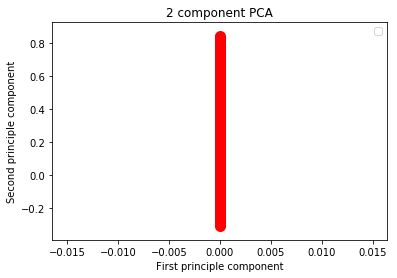

In [8]:
# TODO: Construct a 2D scatter plot
x1=reconMat[:,0]
y1=reconMat[:,1]
plt.xlabel("First principle component")
plt.ylabel("Second principle component")
plt.scatter(x1.tolist(),y1.tolist(),marker='o',color='red',s=100)
plt.legend(loc = 'upper right')
plt.title('2 component PCA')

**Question 3:** Is it easier to perform classification on the transformed space? Justify your answer. (1 point)

*Answer:* It is not easier. The general idea of is to transform the non-linear separable input data into another (high-dimensional) space. Linear decision boundary can separate positive and negative examples in the transformed space. So the problem might occur when we have complex high-dimensional data, sinc it's difficult to figure out its structure and to come up with simple linearizatin mapping. Hence, it's important to have a classifier which was trained on transformed data.

**Question 4:** Now, modify the function  `data_normalization()` you implemented above: in additional to centering, divide each feature/column by its standard deviation. Then apply `PCA()` on this standardized data. Does the performance of PCA improve? Describe your findings (instead of modifying the original function you implemented above, please implement it again in the cell below). (2 points)

***Remark:*** One problem could occur when you divide the feature by its standard deviation: the standard deviation might be zero and division by zero is undefined. However, a standard deviation of zero can only be possible when all the values of a feature/column are the same (all equal to the mean). In this case, those features have no discriminative power so they can be removed from the analysis. Your implementation should be able to handle this case: all columns with zero standard deviation should be removed before standardize the data.

In [9]:
def data_normalization_modified(data):
    # TODO: implement
    data_transpose = data.T 
    df = pd.DataFrame(data_transpose)                                         
    
    # Check for equally valued columns
    col_mat = np.invert(np.all(data == data[0,:], axis = 0)) 
    indices = col_mat.tolist()
    df = df.loc[indices, :]                                   
    data_new = df.as_matrix()                                     
    
    normalized_data = data_normalization(data_new.T)                      
    normalized_data_transpose = normalized_data.T                                   
    std = np.std(normalized_data_transpose, axis=1)[:,None]                           
    new_data_normalized = norma / std 
    
    return new_data_normalized


*Answer:* In general, standartizatin process made the data less scaterred and easier in terms of distinguishing classes for each feature variance (since it becomes 1).


Finally, consider and the following (artificially generated) dataset:

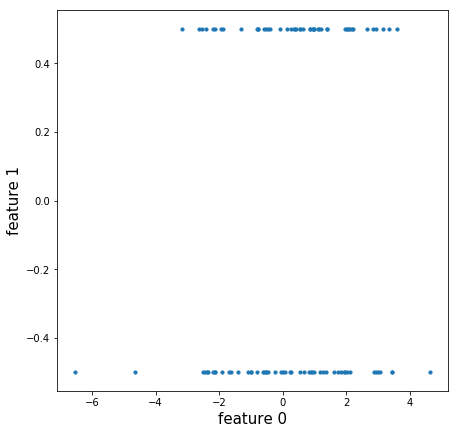

In [10]:
x = np.random.normal(loc=0.0, scale=2.0, size=100)
y = np.random.binomial(1, 0.5, size=100) - 0.5

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 0', fontsize = 15)
ax.set_ylabel('feature 1', fontsize = 15)
ax.scatter(x,y,s = 10);

**Question 5:** Is PCA suitable for the above dataset? Justify your answer. (1 point)

*Answer:* PCA is by all means applicable, but not quite suitable to the given dataset in terms of classification. Of course, this classificationwill reduce the dimension, but having non-correlated features will make it unsuitable.